In [ ]:
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 75.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [ ]:
Mydata = pd.read_csv('/content/helix_parameters.csv')

In [ ]:
Mydata.head()

,job_n,Energy,n_helices,r0_A,r0_B,r0_C,omega0,delta_omega0_A,delta_omega0_B,delta_omega0_C,...,invert_B,invert_C,z1_offset_A,z1_offset_B,z1_offset_C,delta_t_A,delta_t_B,delta_t_C,omega1,z1
0,36019,-387.167,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,-3.0,0,0,0,99.999268,1.51
1,36022,-402.606,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,0.6,0,0,0,99.999268,1.51
2,36020,-395.944,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,-1.8,0,0,0,99.999268,1.51
3,36002,-389.788,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,-3.0,-1.8,0,0,0,99.999268,1.51
4,36005,-388.016,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,-3.0,1.8,0,0,0,99.999268,1.51


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
Mydata.shape

(47475, 27)

In [ ]:
Mydata.columns

Index(['job_n', 'Energy', 'n_helices', 'r0_A', 'r0_B', 'r0_C', 'omega0',
       'delta_omega0_A', 'delta_omega0_B', 'delta_omega0_C', 'z0_offset_A',
       'z0_offset_B', 'z0_offset_C', 'helix1 phase', 'helix 2 phase',
       'helix3 phase', 'invert_A', 'invert_B', 'invert_C', 'z1_offset_A',
       'z1_offset_B', 'z1_offset_C', 'delta_t_A', 'delta_t_B', 'delta_t_C',
       'omega1', 'z1'],
      dtype='object')

In [ ]:
Fileset = Mydata[['Energy', 'helix1 phase', 'helix 2 phase']]
Fileset.head()

,Energy,helix1 phase,helix 2 phase
0,-387.167,0,0
1,-402.606,0,0
2,-395.944,0,0
3,-389.788,0,0
4,-388.016,0,0


In [ ]:
Mytable = Fileset.groupby(['helix1 phase', 'helix 2 phase']).mean()
Mytable.head(15)

Energy
helix1 phase helix 2 phase            
0            0             -392.419841
             20            -389.622691
             40            -390.318620
             60            -392.198537
             80            -393.661624
             100           -392.226253
             120           -390.955112
             140           -394.319969
             160           -392.594862
             180           -389.254009
20           0             -390.013375
             20            -393.121438
             40            -390.435441
             60            -390.489424
             80            -395.112815

In [ ]:
Mytable = Mytable.reset_index()
Mytable.head()

,index,helix1 phase,helix 2 phase,Energy
0,0,0,0,-392.419841
1,1,0,20,-389.622691
2,2,0,40,-390.318620
3,3,0,60,-392.198537
4,4,0,80,-393.661624


In [ ]:
Mytable.pivot('helix1 phase','helix 2 phase')['Energy']

TypeError: DataFrame.pivot() takes 1 positional argument but 3 were given

ValueError: Format specifier missing precision

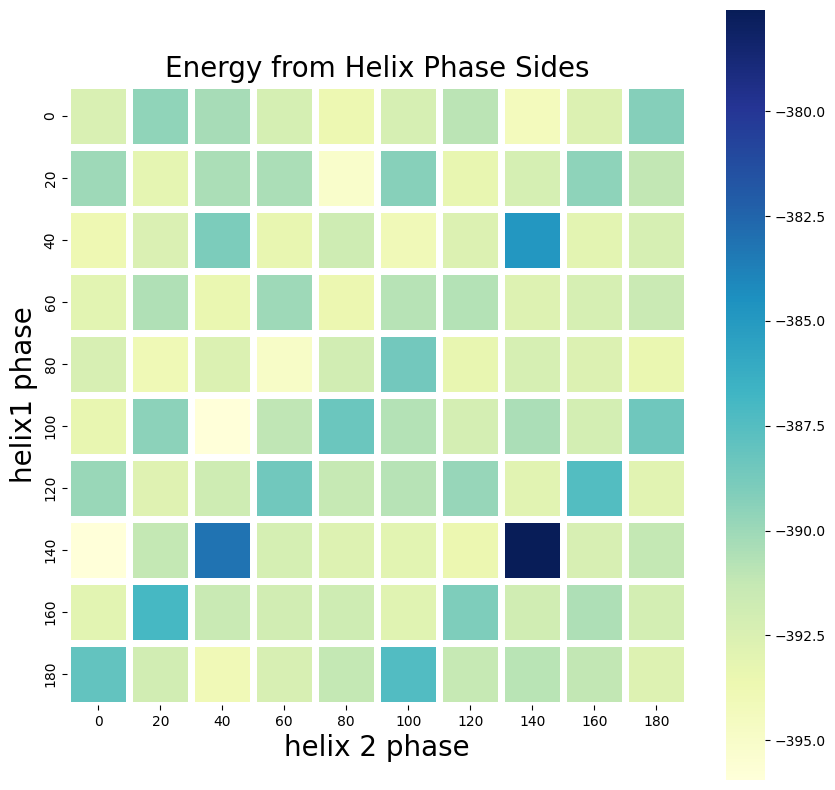

In [ ]:
plt.figure(figsize=(10,10))
pivot_table = Mytable.pivot(index='helix1 phase', columns='helix 2 phase', values='Energy')
plt.xlabel('helix1 phase', size = 20)
plt.ylabel('helix 2 phase', size = 20)
plt.title('Energy from Helix Phase Sides', size = 20)
sns.heatmap(pivot_table, annot=True, fmt=".if", linewidths=5, square = True, cmap= "YlGnBu")